[View in Colaboratory](https://colab.research.google.com/github/avault/chicago_public_schools/blob/master/analysis_setup.ipynb)

# An Example Analysis

# Setup

In [1]:
# Module Imports

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

In [2]:
# Make sure we can see all the data
pd.set_option('display.max_rows', None)

In [3]:
# Load Data
profile_df = pd.read_csv( '../data/Chicago_Public_Schools_-_School_Profile_Information_SY1617.csv' )
progress_df = pd.read_csv( '../data/Chicago_Public_Schools_-_School_Progress_Reports_SY1617.csv' )

In [4]:
profile_df.set_index( 'School_ID', inplace=True )
progress_df.set_index( 'School_ID', inplace=True )

In [5]:
print( '{} school profiles'.format( len( profile_df ) ) )
print( '{} school progress reports'.format( len( progress_df ) ) )

661 school profiles
661 school progress reports


In [6]:
# Combine into one df
combined_df = pd.concat( [profile_df, progress_df ], axis=1 )

In [7]:
# Choose high schools
is_hs = profile_df['Is_High_School'] == 'Y'
hs_df = combined_df.loc[is_hs]

In [8]:
# Allow plotting all columns, and then show them.
for column in hs_df.columns:
    print( column )

Legacy_Unit_ID
Finance_ID
Short_Name
Long_Name
School_Type
Primary_Category
Is_High_School
Is_Middle_School
Is_Elementary_School
Is_Pre_School
Summary
Administrator_Title
Administrator
Secondary_Contact_Title
Secondary_Contact
Address
City
State
Zip
Phone
Fax
CPS_School_Profile
Website
Facebook
Twitter
Youtube
Pinterest
Attendance_Boundaries
Grades_Offered_All
Grades_Offered
Student_Count_Total
Student_Count_Low_Income
Student_Count_Special_Ed
Student_Count_English_Learners
Student_Count_Black
Student_Count_Hispanic
Student_Count_White
Student_Count_Asian
Student_Count_Native_American
Student_Count_Other_Ethnicity
Student_Count_Asian_Pacific_Islander
Student_Count_Multi
Student_Count_Hawaiian_Pacific_Islander
Student_Count_Ethnicity_Not_Available
Statistics_Description
Demographic_Description
ADA_Accessible
Dress_Code
PreK_School_Day
Kindergarten_School_Day
School_Hours
Freshman_Start_End_Time
After_School_Hours
Earliest_Drop_Off_Time
Classroom_Languages
Bilingual_Services
Refugee_Serv

### Some Plotting Functions

In [9]:
def histogram_plot( df, column ):

    fig = plt.figure( figsize=(12,8), facecolor='white' )
    ax = plt.gca()

    ax.hist(
      np.ma.fix_invalid( df[column] ).compressed()
    )

    ax.set_xlabel( column, fontsize=22 )

    plt.xticks( fontsize=20 )

In [10]:
def scatter_plot( df, x_key, y_key ):
  
    fig = plt.figure( figsize=(12,11), facecolor='white' )
    ax = plt.gca()

    ax.scatter(
      df[x_key],
      df[y_key]
    )

    ax.set_xlabel( x_key, fontsize=22 )
    ax.set_ylabel( y_key, fontsize=22 )

    plt.xticks( fontsize=20 )
    plt.yticks( fontsize=20 )

# Analysis

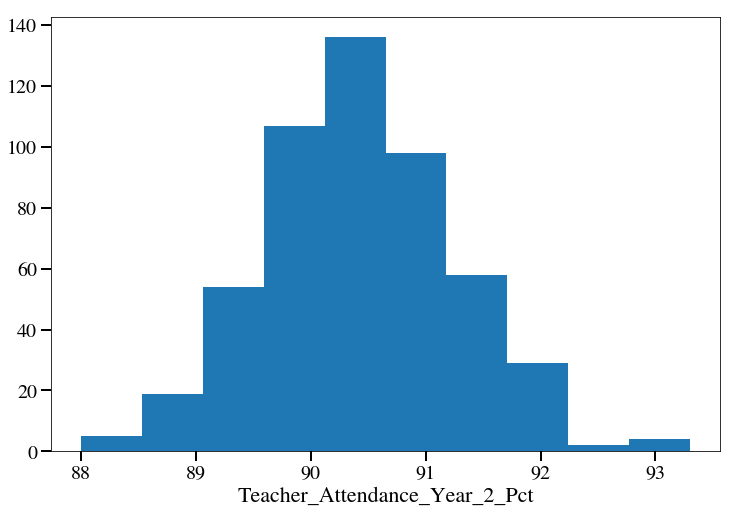

In [12]:
histogram_plot( combined_df, 'Teacher_Attendance_Year_2_Pct' )

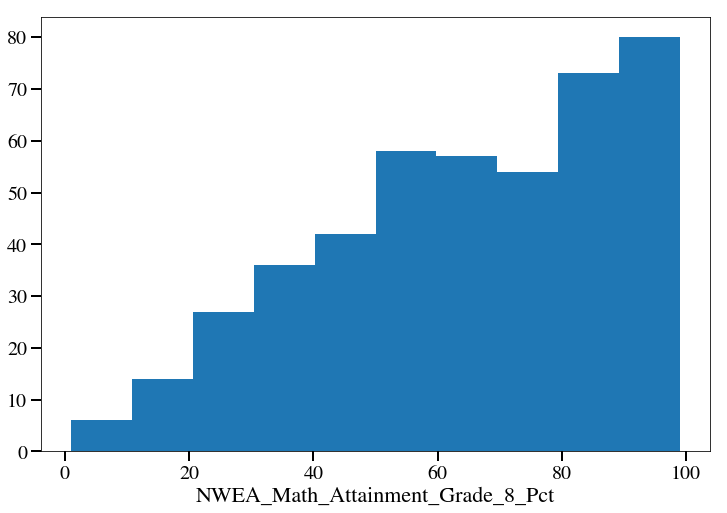

In [14]:
histogram_plot( combined_df, 'NWEA_Math_Attainment_Grade_8_Pct' )

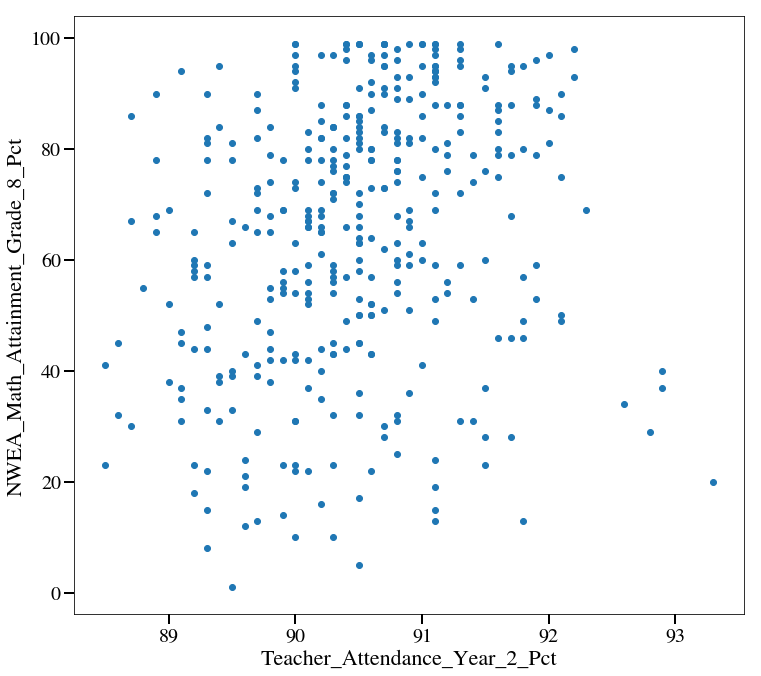

In [15]:
scatter_plot( combined_df, 'Teacher_Attendance_Year_2_Pct',  'NWEA_Math_Attainment_Grade_8_Pct' )

In [19]:
overall_rating_mapping = {
    'NO DATA AVAILABLE': -1,
    'FAR BELOW AVERAGE': 1.,
    'BELOW AVERAGE': 2.,
    'AVERAGE': 3.,
    'ABOVE AVERAGE': 4.,
    'FAR ABOVE AVERAGE': 5.,
}
overall_rating_int = []
for rating in combined_df['Student_Attainment_Rating']:
    overall_rating_int.append( overall_rating_mapping[rating] )
combined_df['Student_Attainment_Rating_Int'] = np.array( overall_rating_int )

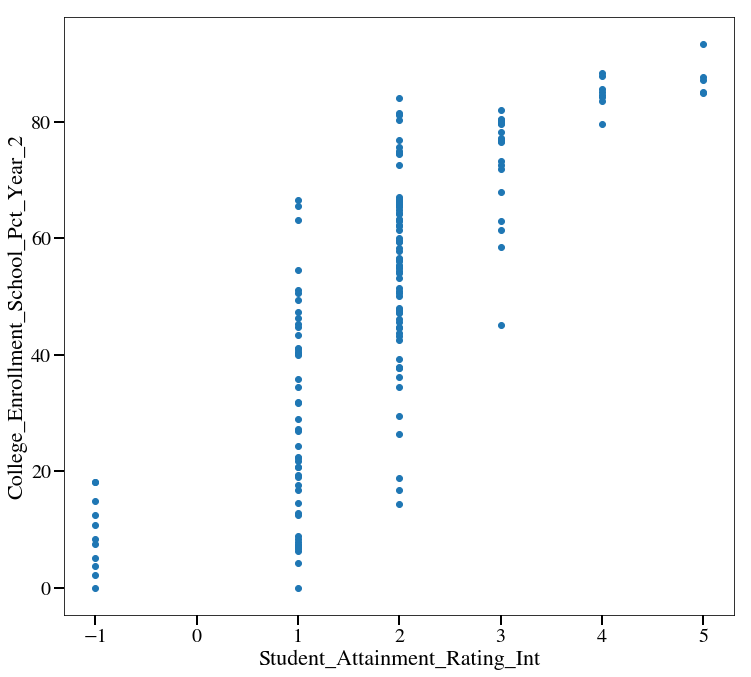

In [23]:
scatter_plot( combined_df, 'Student_Attainment_Rating_Int',  'College_Enrollment_School_Pct_Year_2' )